In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Setting system paramters:

In [3]:
V0 = 1e-6
f0 = 0.6
a = 0.015
b = 0.02
eta = 4.5e6
L = 1e-1
sn = 50e6
Vinit = 1e-9
Vp = 1e-8
k = 500000
yeild_point_init = 10
final_time = 500 * (365 * 24 * 3600)

In [4]:
kcrit = sn * b / L
print('k/kcrit =', k / kcrit)

k/kcrit = 0.05


In [5]:
os.system(f"./app {V0} {f0} {a} {b} {eta} {L} {sn} {Vinit} {Vp} {k} {yeild_point_init} {final_time} out.txt")

Parameters:
V0 = 1e-06
f0 = 0.6
a = 0.015
b = 0.02
eta = 4.5e+06
L = 0.1
sn = 5e+07
Vinit = 1e-09
Vp = 1e-08
k = 500000
Initial state:0.203616
final_time = 1.5768e+10
./app 1e-06 0.6 0.015 0.02 4500000.0 0.1 50000000.0 1e-09 1e-08 500000 10 15768000000 out.txt


In [7]:
df = pd.read_csv('./out.txt')
df['t'] = df.t / (365 * 24 * 3600)

Text(0.5, 25.722222222222214, 'time [years]')

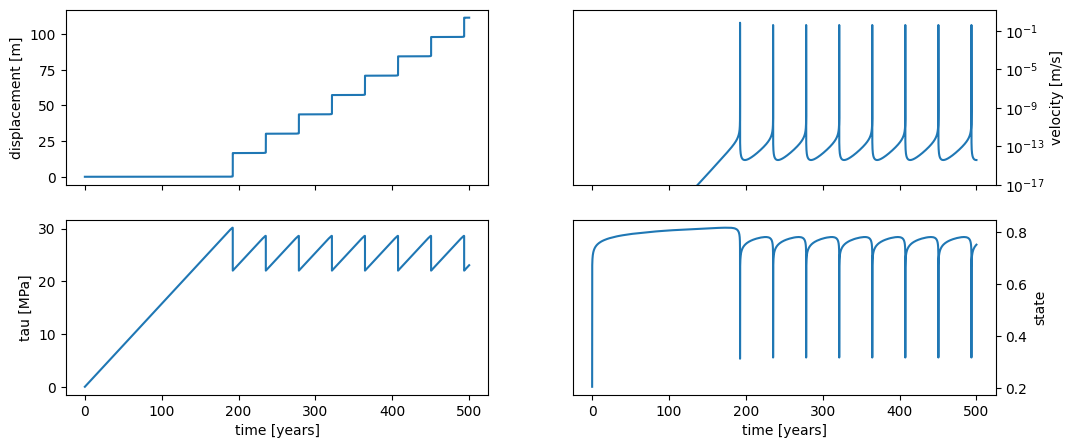

In [10]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(12, 5))
ax = axs[0, 0]
ax.plot(df.t, df.D)
ax.set_ylabel('displacement [m]')


ax = axs[0, 1]
ax.plot(df.t, df.V)
ax.set_yscale('log')
ax.yaxis.tick_right()
ax.set_ylabel('velocity [m/s]')
ax.yaxis.set_label_position("right")
ax.set_ylim(bottom=1e-17)


ax = axs[1, 0]
ax.plot(df.t, df.tau * 1e-6)
ax.set_ylabel('tau [MPa]')
ax.set_xlabel('time [years]')


ax = axs[1, 1]
plt.plot(df.t, df.psi)
ax.yaxis.tick_right()
ax.set_ylabel('state')
ax.yaxis.set_label_position("right")
plt.savefig('output.png')
ax.set_xlabel('time [years]')